In [79]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
df

X_1  X_2  Y
0    1    0  1
1    1    0  1
2    1    0  1
3    0    1  1
4    0    0  0
5    0    0  0
6    0    0  0
7    1    1  0

In [3]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [4]:
# Split features and target to two variables. Double square brackets takes the whole indexed column(s)
X = df[['X_1', 'X_2']]
y = df[['Y']]

In [5]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

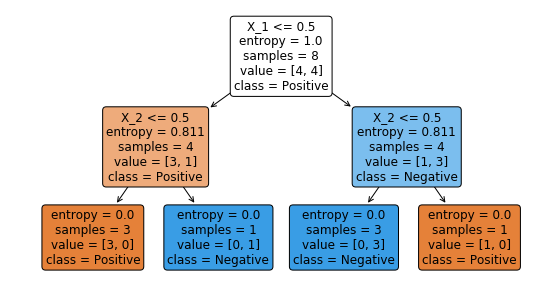

In [6]:
plt.rcParams['figure.figsize'] = (9, 5)
tree.plot_tree(clf, feature_names=list(X), class_names=['Positive', 'Negative'], 
               filled=True, rotate=True, fontsize=12, rounded=True);

In [7]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv', index_col=0)
df.head()

Шерстист  Гавкает  Лазает по деревьям      Вид
0         1        1                   0  собачка
1         1        1                   0  собачка
2         1        1                   0  собачка
3         1        1                   0  собачка
4         1        0                   1    котик

In [8]:
X = df[['Шерстист', 'Гавкает', 'Лазает по деревьям']]
y = df[['Вид']]
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

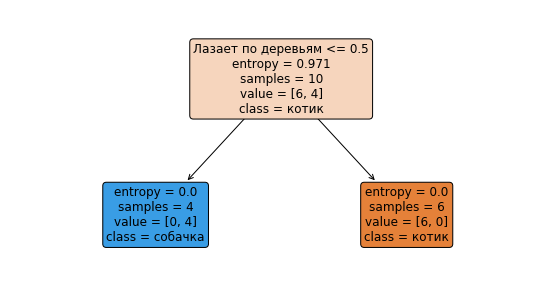

In [9]:
#plt.rcParams['figure.figsize'] = (9, 5)
tree.plot_tree(clf, feature_names=list(X), class_names=['котик', 'собачка'], 
               filled=True, rotate=True, fontsize=12, rounded=True);

## 2.3 Titanic ##

In [2]:
titanic_train = pd.read_csv("MLcourse/data/titanic_train.csv")
titanic_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
titanic_train.shape

(891, 12)

In [4]:
# count number of missing values
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Split to X and y (and drop features unimportant for prediction)
X = titanic_train.drop(columns=['PassengerId','Name','Ticket','Cabin','Survived'])
y = titanic_train.Survived

In [6]:
# One-hot encoding via pandas.get_dummies. It automatically encode only Sex and Embarked features
X = pd.get_dummies(X)
X.head()

Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0   7.2500           0         1           0   
1       1  38.0      1      0  71.2833           1         0           1   
2       3  26.0      0      0   7.9250           1         0           0   
3       1  35.0      1      0  53.1000           1         0           0   
4       3  35.0      0      0   8.0500           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [7]:
# Fill missing values of Age with median Age for all passengers
X.Age.fillna(X.Age.median(), inplace=True)
#X = X.fillna({'Age':X.Age.median()}) #cool too
print(f"Now we have {X.Age.isnull().sum()} missed Age values")

Now we have 0 missed Age values


In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [9]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

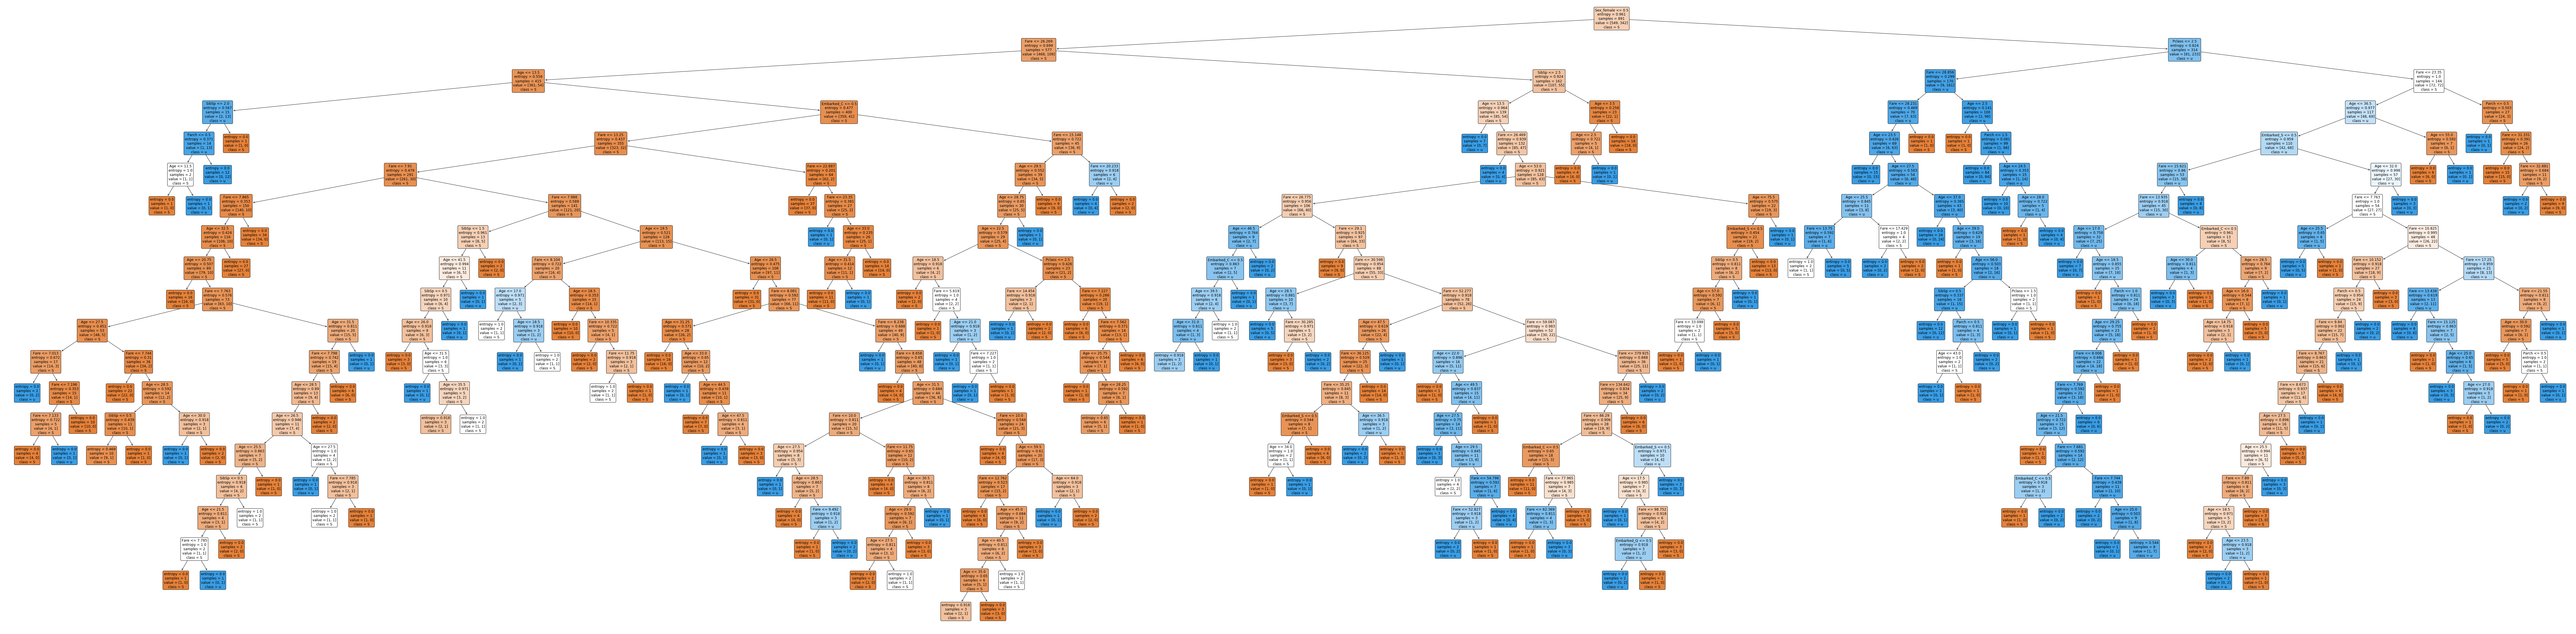

In [10]:
plt.rcParams['figure.figsize'] = (160, 40)
tree.plot_tree(clf, feature_names=list(X), class_names='Survived', 
               filled=True, rotate=True, fontsize=12, rounded=True);
# double click to expand

In [11]:
round(clf.score(X, y)*100, 2)
# percent of right answers without split

97.98

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [13]:
# let's use new classifier object for train/test split 
clf_tts = tree.DecisionTreeClassifier(criterion='gini')
clf_tts.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
round(clf_tts.score(X_train, y_train)*100, 2)

97.99

In [15]:
round(clf_tts.score(X_test, y_test)*100, 2)

74.24

In [16]:
# now restrict max_depth of the tree
clf_tts = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)
clf_tts.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
round(clf_tts.score(X_train, y_train)*100, 2)

83.56

In [18]:
round(clf_tts.score(X_test, y_test)*100, 2)

81.36

In [19]:
# Train 99 trees with various max_depth
max_depth_values = range (1, 100)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf_tts = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf_tts.fit(X_train, y_train)
    train_score = round(clf_tts.score(X_train, y_train)*100, 2)
    test_score = round(clf_tts.score(X_test, y_test)*100, 2)
    # Save current tree perfomance to temporary data frame
    temp_df = pd.DataFrame({'max_depth':[max_depth], 
                            'train_score':[train_score], 
                            'test_score':[test_score]})
    # then add it to resulting data frame
    scores_data = scores_data.append(temp_df)

In [20]:
# tree with best test_score
scores_data[scores_data.test_score == scores_data.test_score.max()]

max_depth  train_score  test_score
0          4        83.39       82.37

In [21]:
scores_data.head()

max_depth  train_score  test_score
0          1        78.19       79.66
0          2        80.54       77.63
0          3        82.38       82.03
0          4        83.39       82.37
0          5        84.06       81.02

In [22]:
# Melt that DF! Instead of two columns with scores we build two with score type and its value
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score','test_score'],
                          var_name='score_type', value_name='score')
scores_data_long.head()

max_depth   score_type  score
0          1  train_score  78.19
1          2  train_score  80.54
2          3  train_score  82.38
3          4  train_score  83.39
4          5  train_score  84.06

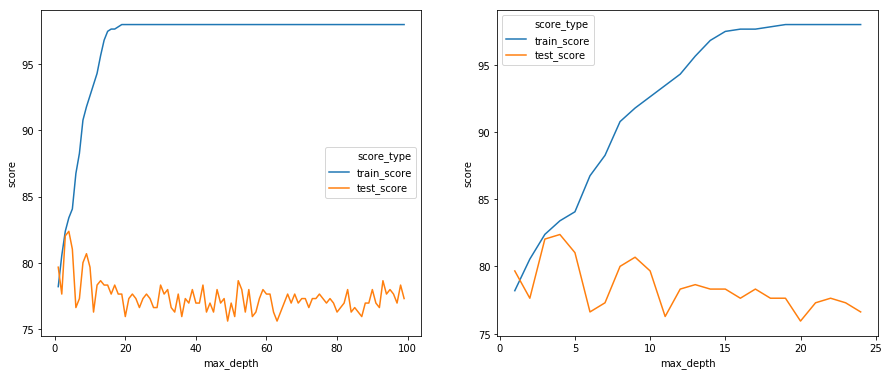

In [23]:
plt.rcParams['figure.figsize'] = (15, 6)
# VERY COOL AND IMPORTANT PLOT!
fig, ax =plt.subplots(1,2)
sns.lineplot(x='max_depth', y='score', hue='score_type', data=scores_data_long, ax=ax[0]);
# and zoom it a little
sns.lineplot(x='max_depth', y='score', hue='score_type', 
             data=scores_data_long[scores_data_long.max_depth<25], ax=ax[1]);
# Without cross-validation model still sucks

In [24]:
clf_tts_cv = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [25]:
# Average accuracy on cross-validation
cross_val_score(clf_tts_cv, X_train, y_train, cv=5).mean()

0.7835799743626264

In [26]:
# Train 99 trees with various max_depth and CV
max_depth_values = range (1, 100)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf_tts_cv = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf_tts_cv.fit(X_train, y_train)
    
    train_score = round(clf_tts_cv.score(X_train, y_train)*100, 2)
    test_score = round(clf_tts_cv.score(X_test, y_test)*100, 2)
    mean_cv_score = round(cross_val_score(clf_tts_cv, X_train, y_train, cv=5).mean()*100, 2)
    
    # Save current tree perfomance to temporary data frame
    temp_df = pd.DataFrame({'max_depth':[max_depth], 
                            'train_score':[train_score], 
                            'test_score':[test_score], 
                            'cv_score':[mean_cv_score]})
    # then add it to resulting data frame
    scores_data = scores_data.append(temp_df)

In [27]:
scores_data.head()

max_depth  train_score  test_score  cv_score
0          1        78.19       79.66     78.19
0          2        80.54       77.63     76.86
0          3        82.38       82.03     78.87
0          4        83.39       82.37     78.36
0          5        84.06       80.68     79.69

In [28]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score','test_score', 'cv_score'],
                          var_name='score_type', value_name='score')
scores_data_long.head()

max_depth   score_type  score
0          1  train_score  78.19
1          2  train_score  80.54
2          3  train_score  82.38
3          4  train_score  83.39
4          5  train_score  84.06

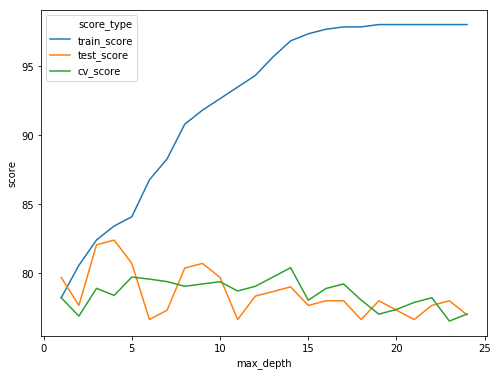

In [29]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.lineplot(x='max_depth', y='score', hue='score_type', 
             data=scores_data_long[scores_data_long.max_depth<25]);

In [30]:
# look at max_depth with max cv_score
#scores_data_long.query('score_type == "cv_score"').head(15)
scores_data_long[scores_data_long.score == scores_data_long.query("score_type == 'cv_score'").score.max()]

max_depth score_type  score
211         14   cv_score  80.37

In [31]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [32]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.8203389830508474

### With GridSearchCV

In [35]:
clf = DecisionTreeClassifier()

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(1, 30)
}

In [36]:
grid_search_cv_clf = GridSearchCV(clf, param_grid=params, cv=5)

In [37]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

In [38]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [39]:
grid_search_cv_clf.best_estimator_.score(X_test, y_test)

0.8033898305084746

In [40]:
y_pred = grid_search_cv_clf.best_estimator_.predict(X_test)
precision_score(y_test, y_pred)

0.8369565217391305

In [41]:
recall_score(y_test, y_pred)

0.6416666666666667

In [42]:
y_predicted_probability = grid_search_cv_clf.best_estimator_\
                            .predict_proba(X_test)

In [46]:
y_predicted_probability[:10]
# probabilities of classification to 0 or 1 class

array([[0.75      , 0.25      ],
       [0.5       , 0.5       ],
       [0.90566038, 0.09433962],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.18181818, 0.81818182],
       [0.90566038, 0.09433962],
       [0.18181818, 0.81818182],
       [0.        , 1.        ]])

In [47]:
y_pred  # predicted classes

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

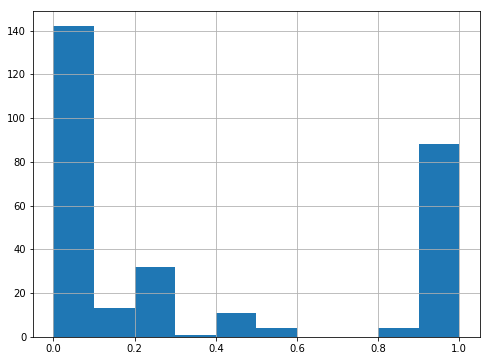

In [69]:
# distribution of probabilities to being dead (0-class)
pd.Series(y_predicted_probability[:,1]).hist();

In [89]:
# classify all objects only with prob of being alive > 0.9 as as alive
y_pred = np.where(y_predicted_probability[:,1] > 0.9, 1, 0)  # (cond, ifTrue, else)

In [90]:
# Precision grows (recall will be low)
precision_score(y_test, y_pred)

0.8409090909090909

#### ROC <s>and roll!</s> and AUC!

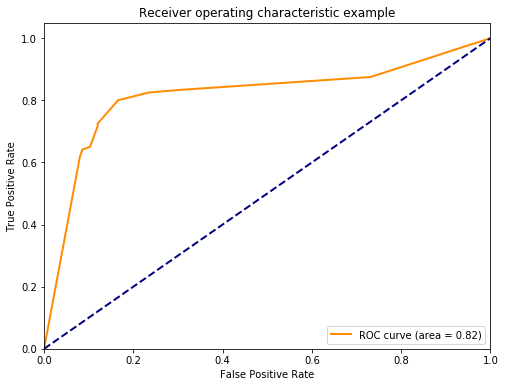

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probability[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show();
# bigger AUC - better model

## 2.4 Iris ##

In [152]:
iris_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
iris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)

In [153]:
iris_train.head()

sepal length  sepal width  petal length  petal width  species
130           7.4          2.8           6.1          1.9        2
7             5.0          3.4           1.5          0.2        0
11            4.8          3.4           1.6          0.2        0
142           5.8          2.7           5.1          1.9        2
109           7.2          3.6           6.1          2.5        2

In [154]:
X_train = iris_train.drop(columns='species')
y_train = iris_train.species

X_test = iris_test.drop(columns='species')
y_test = iris_test.species

In [155]:
max_depth_values = range (1, 101)
scores_data = pd.DataFrame()
np.random.seed(0)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test = cross_val_score(clf, X_test, y_test, cv=5).mean()
    # Save current tree perfomance to temporary data frame
    temp_df = pd.DataFrame({'max_depth':[max_depth], 
                            'train_score':[train_score], 
                            'test':[test]})
    # then add it to resulting data frame
    scores_data = scores_data.append(temp_df)

In [156]:
scores_data.head()

max_depth  train_score  test
0          1         0.70  0.70
0          2         0.97  0.94
0          3         0.99  0.92
0          4         1.00  0.94
0          5         1.00  0.92

In [157]:
scores_data = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score','test'],
                          var_name='type', value_name='score')
scores_data.head()

max_depth         type  score
0          1  train_score   0.70
1          2  train_score   0.97
2          3  train_score   0.99
3          4  train_score   1.00
4          5  train_score   1.00

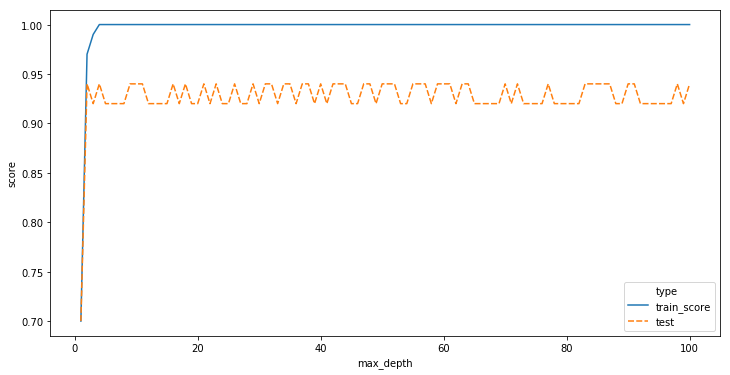

In [158]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.lineplot(x="max_depth", y="score", hue="type", data=scores_data,
            style="type");

## 2.4 КОТИКИ и СОБАЧКИ ##

In [34]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
df.head()

Длина  Высота  Шерстист  Гавкает  Лазает по деревьям      Вид
0     15    18.0         1        1                   0  собачка
1     20    24.0         1        0                   0  собачка
2     34    40.8         1        1                   0  собачка
3     26    31.2         1        1                   0  собачка
4     16    19.2         1        1                   0  собачка

In [35]:
# No missing values
df.isna().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [36]:
df.Вид.value_counts()

собачка    500
котик      500
Name: Вид, dtype: int64

In [37]:
## Data Preparation
X = df.drop(columns='Вид')
X.head()

Длина  Высота  Шерстист  Гавкает  Лазает по деревьям
0     15    18.0         1        1                   0
1     20    24.0         1        0                   0
2     34    40.8         1        1                   0
3     26    31.2         1        1                   0
4     16    19.2         1        1                   0

In [39]:
y = df.Вид
y = y.map({'собачка':0, 'котик':1})
y.tail()

995    1
996    1
997    1
998    1
999    1
Name: Вид, dtype: int64

In [ ]:
## Decision Tree ##

In [25]:
dtc = tree.DecisionTreeClassifier(random_state=13)
dtc.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=13, splitter='best')

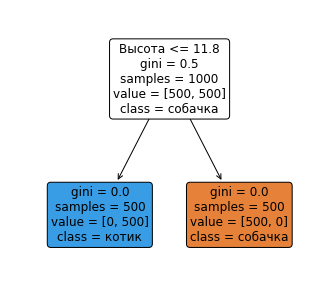

In [43]:
plt.rcParams['figure.figsize'] = (5, 5)
tree.plot_tree(dtc, feature_names=list(X), class_names=df.Вид.unique(), 
               filled=True, rotate=True, fontsize=12, rounded=True);

In [45]:
# percent of right answers without split
round(dtc.score(X, y)*100, 2)

100.0

### With train/test split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=13)

In [49]:
dtc_tts = tree.DecisionTreeClassifier(random_state=13)
dtc_tts.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=13, splitter='best')

In [51]:
# percent of right answers without split
print("For train ",round(dtc_tts.score(X_train, y_train)*100, 2))
print("For test ",round(dtc_tts.score(X_test, y_test)*100, 2))

For train  100.0
For test  100.0


In [81]:
## Prediction
df_test = pd.read_json("C:\\Users\Jack\Downloads\dataset_209691_15.txt")

In [83]:
predicted = dtc_tts.predict(df_test)
pred_df = pd.DataFrame({'Вид': predicted})
pred_df = pd.DataFrame(pred_df.Вид.apply(lambda x: 'котик' if x else 'собачка'))
pred_df.head()

Вид
0  собачка
1  собачка
2  собачка
3  собачка
4  собачка

In [84]:
pred_df.Вид.value_counts()

котик      52
собачка    48
Name: Вид, dtype: int64

### -------------------------------------------------------------------------------------------------------------------------------------------------------

In [92]:
print(f"Precision {15/(15+15)}\nrecall\
{15/(15+30)}\nF1 {2*(0.5*.33)/(.5+.33)}")

Precision 0.5
recall0.3333333333333333
F1 0.39759036144578314


In [12]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')
df.head()

song  year          artist    genre  \
0            the-ownerz  2007       gangstarr  Hip-Hop   
1  dead-sound-of-misery  2006  blind-guardian    Metal   
2         modred-s-song  2006  blind-guardian    Metal   
3        the-ninth-wave  2015  blind-guardian    Metal   
4                skills  2014       gangstarr  Hip-Hop   

                                              lyrics  length  commas  \
0  "One-two.."\n"One-two, shots to the chin.. kno...    1300      24   
1  It's dark\nLet's do it now\nBring in the siren...    1566       0   
2  I've lost my battle before it starts\nmy first...     996       1   
3  As dark night embraces\nWe are the nation\nI w...    2868       5   
4  Skills, skills, skills\n"My Microphone"\n"It's...    3351      22   

   exclamations  colons  hyphens  
0             5       0       11  
1             0       0        0  
2             0       1        0  
3             0       0        0  
4             0       0        3

In [13]:
df.genre.value_counts()

Pop        126
Hip-Hop    125
Metal      109
Name: genre, dtype: int64

In [14]:
df.drop(columns=["lyrics","song",'genre','year'], inplace=True)

In [15]:
df.head()

artist  length  commas  exclamations  colons  hyphens
0       gangstarr    1300      24             5       0       11
1  blind-guardian    1566       0             0       0        0
2  blind-guardian     996       1             0       1        0
3  blind-guardian    2868       5             0       0        0
4       gangstarr    3351      22             0       0        3

In [16]:
X = df.drop(columns='artist')
y = df.artist

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=13)

In [75]:
dtc_tts = tree.DecisionTreeClassifier()
dtc_tts.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
print("For train ", round(dtc_tts.score(X_train, y_train)*100, 2))
print("For test ", round(dtc_tts.score(X_test, y_test)*100, 2))

For train  99.59
For test  73.11


In [77]:
predictions = dtc_tts.predict(X_test)
precision_score(y_test, predictions, average='micro')

0.7310924369747899

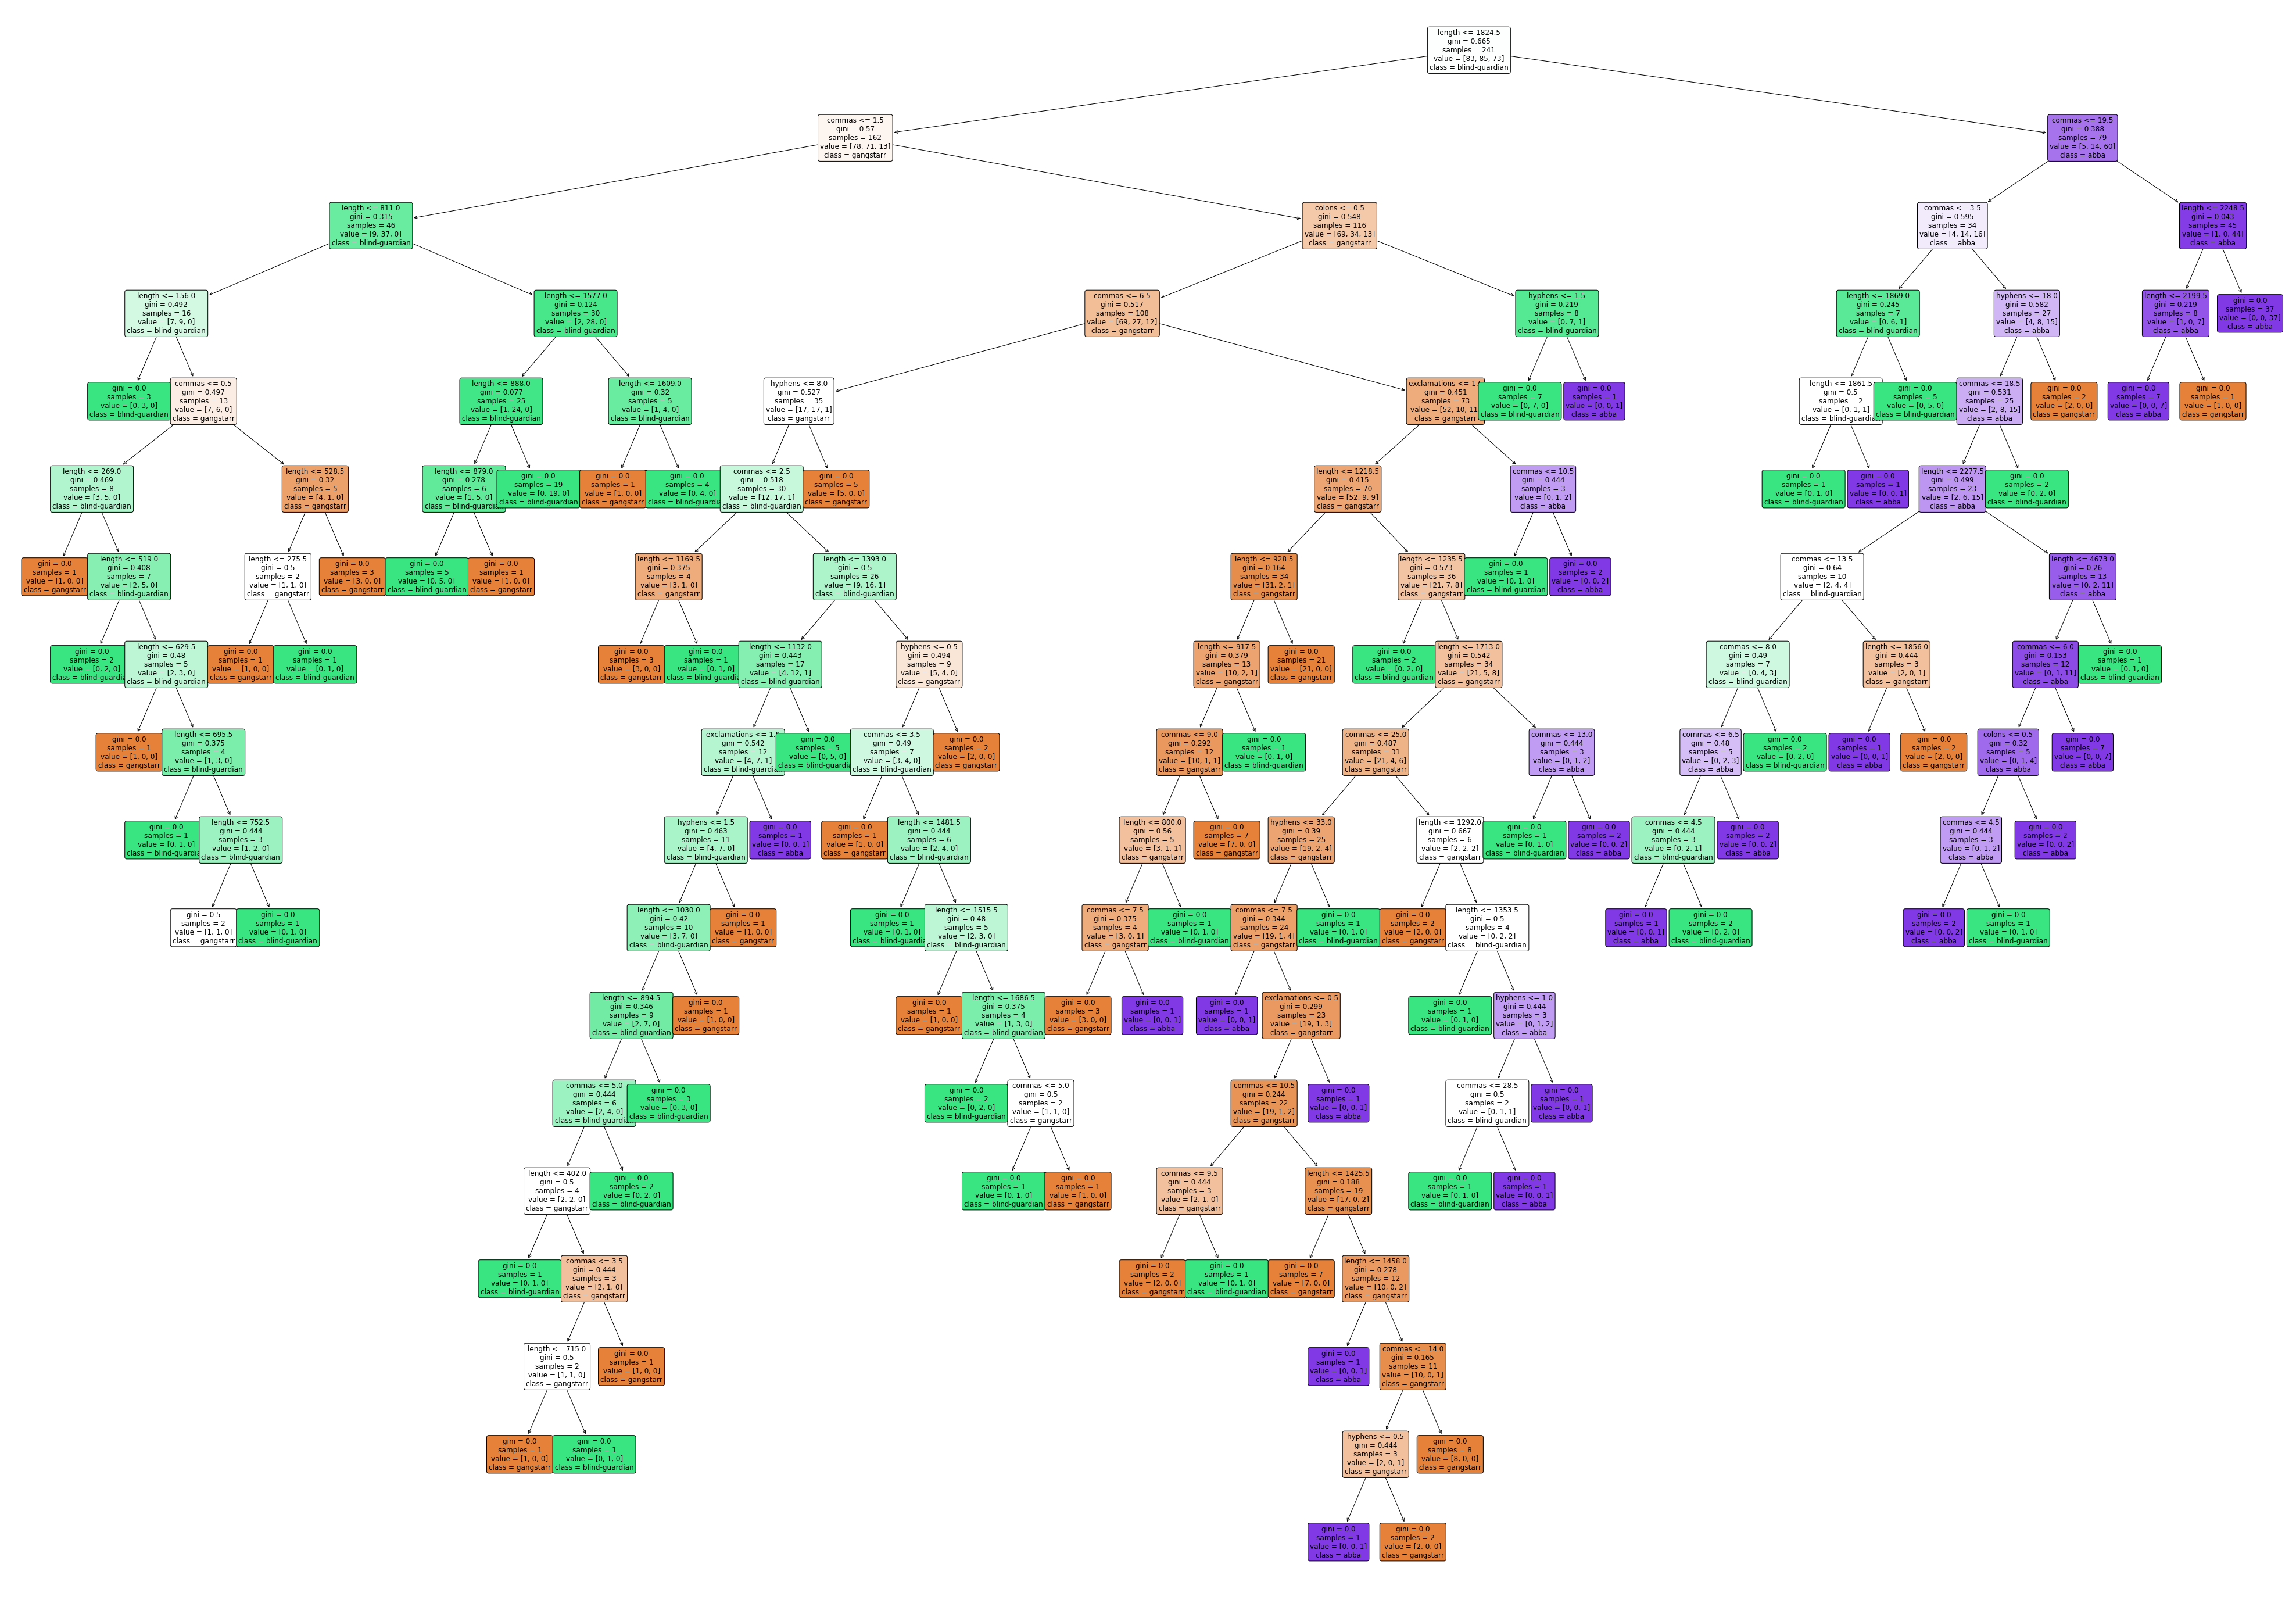

In [78]:
# plt.rcParams['figure.figsize'] = (70, 50)
# tree.plot_tree(dtc_tts, feature_names=list(X), class_names=df.artist.unique(), 
#                filled=True, rotate=True, fontsize=12, rounded=True);